In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()

In [5]:
cos_sim = []

In [6]:
def get_cosine_similarity(doc):
    sparse_matrix = count_vectorizer.fit_transform(doc)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())
    distance = cosine_similarity(df, df)
    return distance

In [7]:
myFile = []
f = open('32_benign_shuffled','r', encoding = "UTF-8")

for line in f:
    myFile.append(line.strip())

In [8]:
len(myFile)

1200

In [9]:
import time

In [10]:
#Sequential Cosine Similarity Calculation i.e., between 2 consecutive sentences at a time)
start = time.time()
doc = []
for i in range(0, len(myFile)-1):
    for j in range(0, len(myFile)-1):
        if i != j:
            doc.append(myFile[i])
            doc.append(myFile[j])
            cs = get_cosine_similarity(doc)
            cos_sim_val = cs[0][1]
            #print(f'CS between sentence {i+1}  and sentence {j+1} is:{cs[0][1]}')
            cos_sim.append(cos_sim_val)
            doc = []
end = time.time()

In [11]:
time_taken = end - start
print(f"Time taken for cosine similarity computation is {time_taken}, i.e. {time_taken/60} minutes")

Time taken for cosine similarity computation is 3454.4833669662476, i.e. 57.57472278277079 minutes


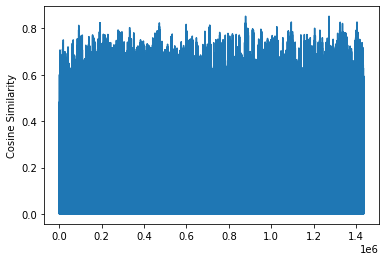

In [12]:
plt.plot(cos_sim)
plt.ylabel("Cosine Similarity")
plt.show()

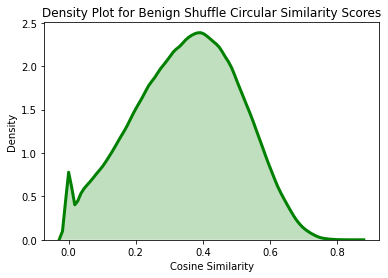

In [13]:
# Density Plot and Histogram of all benign scores

start = time.time()
sns.distplot(cos_sim, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})
end = time.time()
plt.title('Density Plot for Benign Shuffle Circular Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

time2 = end - start

In [14]:
print(f"Time taken for cosine similarity computation is {time2} secondss")

Time taken for cosine similarity computation is 6.728629112243652 secondss


In [15]:
with open('32_cs_ben_shuf_file_seq_circular.txt', 'w') as f:
    for item in cos_sim:
        f.write("%s\n" % item)